In [1]:
import torch
from dpp_nets.my_torch.simulator2 import SimulClassifier
from dpp_nets.helper.plotting import plot_floats, plot_dict


In [21]:
# Global Settings
input_set_size = 15
aspects_n = 5
dtype = torch.DoubleTensor
path = '/Users/Max/Desktop/master thesis/latex/figures/plots'

fname = None  
title = 'Loss over Time'
xlabel = 'Training Steps'
ylabel = 'BCE Loss'

reg=10
reg_mean = 5

train_steps = 5000
batch_size = 20
lr = 1e-3
reg=100
reg_mean = aspects_n
sample_iter = 5

In [28]:
# Multi-Sample + Baseline
# Reg is already scaled by sample_iter :)
torch.manual_seed(0)
best = SimulClassifier(input_set_size, aspects_n, dtype)
best.train(train_steps, batch_size, 5, baseline=True, lr=1e-2, reg=1, reg_mean=reg_mean)
best.evaluate(1000)

0.6935283873630498
0.6949331462553837
0.6977764699275221
0.7003840180346376
0.6938847046519957
0.6955219252885648
0.6941583453592969
0.6984275425247425
0.692951659121005
0.6902967353865265
0.6932891314474422
0.6925669248807269
0.6922369652563601
0.694102889036817
0.6965947146504509
0.6913673663707125
0.6935232961456964
0.6941238288854567
0.6941578241492777
0.694550809588693
0.6939755039590857
0.6953452069699673
0.6913484354433637
0.6923046169037924
0.6965301613481908
0.691726562796692
0.6886953943371559
0.6953201935942791
0.6997115470478218
0.6956253261738411
0.6910692609325403
0.6936393863939047
0.6924127410450082
0.6929902849502289
0.6919744876097392
0.6894695064319571
0.6944360070178351
0.6948873279137301
0.6925935984665113
0.6950921798354274
0.694378125867159
0.6929941239646937
0.6957523116034262
0.6907389515783307
0.6919200476628824
0.6967573800998675
0.6964088859073443
0.6901945303541486
0.6943866900971192
0.6904044151058567
Loss: 0.6932608163428556 Pred Acc: 0.5037999999999998 P

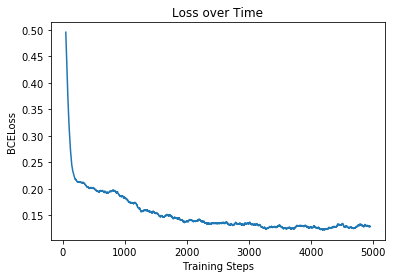

In [25]:
# Plots
plot_floats(best.loss_dict, 100, fname, title, xlabel, ylabel)

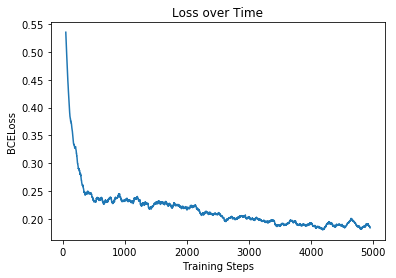

In [27]:
# Plots
plot_floats(pure_reinforce.loss_dict, 100, fname, title, xlabel, ylabel)

In [26]:
# Pure Reinforce
torch.manual_seed(0)
pure_reinforce = SimulClassifier(30, aspects_n, dtype)
pure_reinforce.train(train_steps, batch_size, 1, baseline=False, lr=lr, reg=reg, reg_mean=reg_mean)
pure_reinforce.evaluate(1000)

0.4529880745355033
0.2923851134887452
0.27710466249917776
0.1964949544250091
0.32073829215040883
0.27013666189250585
0.2201889488999825
0.28268772324739094
0.2555192369211301
0.3149611828062215
0.1401187606730852
0.3685850484763339
0.1831653672353092
0.23182783842535876
0.23554200774999448
0.1594890970709661
0.30922404526198877
0.19833164925601723
0.2063350899765941
0.21846008089411167
0.28654518166688947
0.1804741477249642
0.20884873753586333
0.2211317253025585
0.19120940752021334
0.13936796195111484
0.25877924054318124
0.1659523584681171
0.16421288018081207
0.17716988540260098
0.22774765539988215
0.17732152020210754
0.1991138337513238
0.21381506171075282
0.20447183373101735
0.15439799309609878
0.19921318466065002
0.14321658421440694
0.16630973031653332
0.18754684637855878
0.18623546014432862
0.17530044339924872
0.22324245225418565
0.21739527672168218
0.23180402522221272
0.16991117129036373
0.19903172756229606
0.17069542978261715
0.18653031982837648
0.13831506698426554
Loss: 0.1969421

In [34]:
plot_floats(pure_reinforce.loss_dict, 10, fname, title, xlabel, ylabel)

0.042980946477071076 0.9793999999999983 0.5925 0.9479999999999963 8.0


In [ ]:
# Multi-Sampling
torch.manual_seed(0)
multi = SimulClassifier(20, aspects_n, dtype)
multi.train(train_steps, batch_size, sample_iter, baseline=False, lr=lr, reg=reg, reg_mean=reg_mean)
multi.evaluate(1000)
plot_floats(multi.loss_dict, 10, fname, title, xlabel, ylabel)

In [ ]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
f, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)

plt.show()

In [ ]:
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')


In [ ]:
plt.show()

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
plt.suptitle('Global Title')
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

In [ ]:
N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))
plt.show()

In [ ]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')
reg5 = (0.32)
reg6 = (0.3)
reg7 = (0.24)
reg8 = (0.7)
reg9 = (0.75)
reg10 = (0.8)

linc = 1
linm = 0.1
ind = [linc + linm * i for i in range(6)]  # the x locations for the groups
width = 0.05       # the width of the bars

fig, ax = plt.subplots()
rects5 = ax.bar(ind[0], reg5, width, color='0.9')
rects6 = ax.bar(ind[1], reg6, width, color='0.75')
rects7 = ax.bar(ind[2], reg7, width, color='0.6')
rects8 = ax.bar(ind[3], reg8, width, color='0.45')
rects9 = ax.bar(ind[4], reg9, width, color='0.3')
rects10 = ax.bar(ind[5], reg10, width, color='0.15')

# add some text for labels, title and axes ticks
ax.set_title('Segmentation Task (higher is better)')
plt.xticks([], [])
#plt.axis('off')
ax.set_xlabel('Overall')
ax.set_ylim([0,1])
ax.set_ylabel('Accuracy')
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

def curate_ax(idx, ax, my_data):
    
    x_c = 1
    x_m = 0.06
    x_positioning = [x_c + x_m*i for i in range(len(my_data))]
    width = 0.05 # width of bars
    colors = ['0.9', '0.75', '0.6', '0.45', '0.3', '0.15']
    
    rects = []
    for i, data in enumerate(my_data):
        r = ax.bar(x_positioning[i], data[idx], width, color=colors[i])
        rects.append(r)
        #autolabel(r)
    return rects

In [ ]:
my_data = [[0.32, 0.4, 0.39],[0.30, 0.4, 0.2],[0.24,0.4, 0.1],
           [0.7,0.4, 0.3],[0.75,0.4, 0.7],[0.8,0.4,0.6]]
f, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True)

# Create subplots subplot
rects0 = curate_ax(0, ax0, my_data)
curate_ax(1, ax1, my_data)
curate_ax(2, ax2, my_data)

# Axis and Title Settings
plt.suptitle('Learning To Count Clusters')

# y-axis 
ax0.set_yticks([0,1])
ax0.set_ylim([0,1])
ax0.set_ylabel('Accuracy')

# x-axis
ax0.set_xticks([],[])
ax1.set_xticks([],[])
ax2.set_xticks([],[])

ax0.set_xlabel('All Sets')
#ax0.set_title('y = 5')

# Legend
#ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))
plt.legend((rects0[0], rects0[1], rects0[2], rects0[3], rects0[4], rects0[5]), 
           ('5', '6', '7','8','9','10'), 
           loc = 'best', bbox_to_anchor = (0,-0.1,1.1,1),
           bbox_transform = plt.gcf().transFigure)
plt.show()